In [1]:
from pathlib import Path
import pandas as pd 

In [2]:
data_file = Path("original_data/owid-covid-data.csv")

In [3]:
data_file_df = pd.read_csv(data_file)
data_file_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [4]:
data_file_df["total_tests"].count()

79387

In [5]:
data_file_df["total_tests_per_thousand"].count()

79387

In [6]:
data_file_df.count()

iso_code                                   323796
continent                                  308394
location                                   323796
date                                       323796
total_cases                                286549
                                            ...  
population                                 323796
excess_mortality_cumulative_absolute        11299
excess_mortality_cumulative                 11299
excess_mortality                            11299
excess_mortality_cumulative_per_million     11299
Length: 67, dtype: int64

In [7]:
#Fill nan cells with zero
data_file_df["total_tests"] = data_file_df["total_tests"].fillna(0)
data_file_df["total_tests_per_thousand"] = data_file_df["total_tests_per_thousand"].fillna(0)
data_file_df["total_tests_per_thousand"].count()

323796

In [8]:
#change data type of date column to datetime
data_file_df['date'] = pd.to_datetime(data_file_df['date'])
data_file_df.dtypes


iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [9]:
data_file_df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [10]:
#Drop fields with labels not considered a country such as Africa 
data_file_df.dropna(subset=["continent"], inplace=True)
data_file_df.count()

iso_code                                   308394
continent                                  308394
location                                   308394
date                                       308394
total_cases                                271407
                                            ...  
population                                 308394
excess_mortality_cumulative_absolute        11299
excess_mortality_cumulative                 11299
excess_mortality                            11299
excess_mortality_cumulative_per_million     11299
Length: 67, dtype: int64

In [11]:
#Checking country names in location column are actually countries 
data_file_df["location"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswat

In [12]:
#filter dataframe fro dates March 2020 - June 2022
cleaned_df = data_file_df.loc[(data_file_df["date"]>="2020-01-03") & (data_file_df["date"]<="2022-06-01")]
cleaned_df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
323392,ZWE,Africa,Zimbabwe,2022-05-28,251959.0,313.0,198.571,5500.0,2.0,1.571,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323393,ZWE,Africa,Zimbabwe,2022-05-29,252092.0,133.0,207.143,5500.0,0.0,0.857,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323394,ZWE,Africa,Zimbabwe,2022-05-30,252092.0,0.0,198.571,5500.0,0.0,0.714,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323395,ZWE,Africa,Zimbabwe,2022-05-31,252398.0,306.0,209.857,5503.0,3.0,1.000,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
323396,ZWE,Africa,Zimbabwe,2022-06-01,252703.0,305.0,210.714,5506.0,3.0,1.429,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [22]:
#Filterting dataset and storing values that correspond to certain country in a list. 
import numpy as np
import matplotlib.pyplot as plt

#For for loop (and later for legend labels)
country = ["Denmark", "Italy", "South Korea", "Canada", "United States", "Australia"]

for i in country:
    data_by_country=cleaned_df.loc[(cleaned_df["location"]== i)]
    
    if i == country[0]:
        Denmark_test = data_by_country["total_tests_per_thousand"].tolist()
    
    if i == country[1]:
        Italy_test = data_by_country["total_tests_per_thousand"].tolist() 
    
    if i == country[2]:
        Korea_test = data_by_country["total_tests_per_thousand"].tolist()
    
    if i == country[3]:
        Canada_test = data_by_country["total_tests_per_thousand"].tolist()
    
    if i == country[4]:
        US_test = data_by_country["total_tests_per_thousand"].tolist()
        
    if i == country[5]:
        Australia_test = data_by_country["total_tests_per_thousand"].tolist()
        
   
Australia_test

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.262,
 0.278,
 0.323,
 0.349,
 0.394,
 0.573,
 0.644,
 0.791,
 0.871,
 1.719,
 1.97,
 2.24,
 3.987,
 4.274,
 4.726,
 5.115,
 5.541,
 6.044,
 6.498,
 6.942,
 7.438,
 8.104,
 8.623,
 8.987,
 9.449,
 9.908,
 10.304,
 10.719,
 11.09,
 11.467,
 11.68,
 11.99,
 12.325,
 12.74,
 13.057,
 13.534,
 13.658,
 13.975,
 14.143,
 14.327,
 14.66,
 15.105,
 15.683,
 16.245,
 16.656,
 16.979,
 17.458,
 18.003,
 18.609,
 19.068,
 19.538,
 19.948,
 20.473,
 21.003,
 21.744,
 22.718,
 23.594,
 24.424,
 25.084,
 25.645,
 26.567,
 27.875,
 29.214,
 30.688,
 31.938,
 32.989,
 33.869,
 35.069,
 36.391,
 37.954,
 39.182,
 40.204,
 

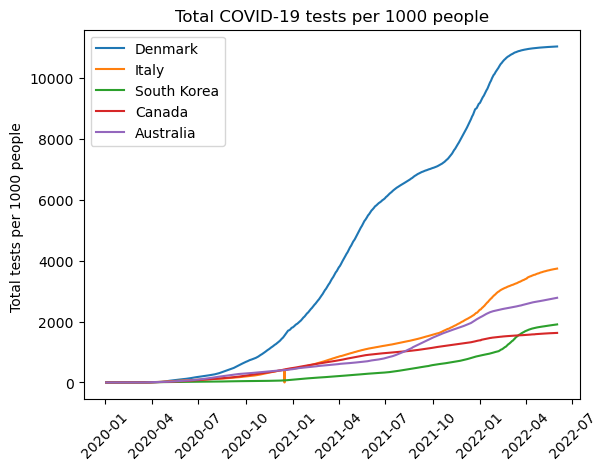

In [24]:
#plotting line plot showing total tests per 1000 people
date_country=cleaned_df.loc[(cleaned_df["location"]=="Denmark")]["date"]

plt.plot(date_country, Denmark_test, label = 'Denmark')
plt.plot(date_country, Italy_test, label = 'Italy')
plt.plot(date_country, Korea_test, label = 'South Korea')
plt.plot(date_country, Canada_test, label = 'Canada')
#plt.plot(date_country, US_test, label = 'United States')
plt.plot(date_country, Australia_test, label = 'Australia')

plt.title('Total COVID-19 tests per 1000 people')
plt.ylabel('Total tests per 1000 people ')
plt.xticks(rotation = 45)
plt.legend()
plt.show()
